In [1]:
# Core data libraries
%pip install pandas
%pip install numpy

# Visualization libraries
%pip install matplotlib
%pip install seaborn

# Statistical modeling
%pip install statsmodels
%pip install scipy

# Machine learning libraries
%pip install scikit-learn
%pip install catboost
%pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 32.3 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new rele

In [2]:
# Extended analysis centered on 'readmitted':

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from scipy.stats import f_oneway


In [3]:
diabetes_cleaned = pd.read_csv('/workspaces/SP25-Project/data/diabetes_cleaned.csv')

In [4]:
print(diabetes_cleaned.columns)

Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'readmitted_binary', 'max_glu_serum_binary', 'A1Cresult_binary',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'insulin_binary'],
      dtype='object')


In [5]:
# Check for missing values in the specified columns
columns_to_check = ['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'readmitted_binary', 'max_glu_serum_binary', 'A1Cresult_binary',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'insulin_binary']

# Display missing values count for each column
missing_values = diabetes_cleaned[columns_to_check].isnull().sum()
print("Missing values in selected columns:")
print(missing_values)

Missing values in selected columns:
gender                  0
age                     0
time_in_hospital        0
num_lab_procedures      0
num_procedures          0
num_medications         0
number_outpatient       0
number_emergency        0
number_inpatient        0
number_diagnoses        0
readmitted_binary       0
max_glu_serum_binary    0
A1Cresult_binary        0
race_Asian              0
race_Caucasian          0
race_Hispanic           0
race_Other              0
insulin_binary          0
dtype: int64


## T-TEST
Comparing means between two groups (e.g., readmitted vs. not) for binary predictors: 

In [6]:

from scipy.stats import ttest_ind

binary_vars = ['gender', 'max_glu_serum_binary', 'A1Cresult_binary', 'insulin_binary']

for var in binary_vars:
    group0 = diabetes_cleaned[diabetes_cleaned['readmitted_binary'] == 0][var]
    group1 = diabetes_cleaned[diabetes_cleaned['readmitted_binary'] == 1][var]
    stat, p = ttest_ind(group0, group1)
    print(f"T-test for {var}: t-statistic = {stat:.4f}, p-value = {p:.4f}")


T-test for gender: t-statistic = 0.9276, p-value = 0.3536
T-test for max_glu_serum_binary: t-statistic = -3.6358, p-value = 0.0003
T-test for A1Cresult_binary: t-statistic = 4.5753, p-value = 0.0000
T-test for insulin_binary: t-statistic = -10.6181, p-value = 0.0000


## ANOVA
Continuous predictors to see if their means differ between readmitted_binary groups:

In [7]:
from scipy.stats import f_oneway

numeric_vars = [
    'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

for var in numeric_vars:
    group0 = diabetes_cleaned[diabetes_cleaned['readmitted_binary'] == 0][var]
    group1 = diabetes_cleaned[diabetes_cleaned['readmitted_binary'] == 1][var]
    stat, p = f_oneway(group0, group1)
    print(f"ANOVA for {var}: F-statistic = {stat:.4f}, p-value = {p:.4f}")

ANOVA for age: F-statistic = 31.6681, p-value = 0.0000
ANOVA for time_in_hospital: F-statistic = 199.1633, p-value = 0.0000
ANOVA for num_lab_procedures: F-statistic = 42.1974, p-value = 0.0000
ANOVA for num_procedures: F-statistic = 15.1959, p-value = 0.0001
ANOVA for num_medications: F-statistic = 150.5311, p-value = 0.0000
ANOVA for number_outpatient: F-statistic = 36.3264, p-value = 0.0000
ANOVA for number_emergency: F-statistic = 376.8771, p-value = 0.0000
ANOVA for number_inpatient: F-statistic = 2853.0580, p-value = 0.0000
ANOVA for number_diagnoses: F-statistic = 250.1338, p-value = 0.0000


## CHI-SQUARE
One-hot encoded race variables (nominal data):

In [8]:
from scipy.stats import chi2_contingency
import pandas as pd

race_vars = ['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other']

for var in race_vars:
    contingency = pd.crosstab(diabetes_cleaned[var], diabetes_cleaned['readmitted_binary'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-Square for {var}: chi2 = {chi2:.4f}, p-value = {p:.4f}")

Chi-Square for race_Asian: chi2 = 0.5771, p-value = 0.4474
Chi-Square for race_Caucasian: chi2 = 5.1160, p-value = 0.0237
Chi-Square for race_Hispanic: chi2 = 1.1118, p-value = 0.2917
Chi-Square for race_Other: chi2 = 3.4319, p-value = 0.0639


### Statistical Analysis of Variables Associated with *readmitted_binary*

## Most Significant (p < 0.0001)

| Variable             | Test     | F/t/Chi² Statistic | p-value | Interpretation                        |
|----------------------|----------|--------------------|---------|----------------------------------------|
| number_inpatient     | ANOVA    | 2853.0580          | 0.0000  | Extremely strong association           |
| number_emergency     | ANOVA    | 376.8771           | 0.0000  | Strong association                     |
| number_diagnoses     | ANOVA    | 250.1338           | 0.0000  | Strong association                     |
| time_in_hospital     | ANOVA    | 199.1633           | 0.0000  | Strong association                     |
| num_medications      | ANOVA    | 150.5311           | 0.0000  | Strong association                     |
| age                  | ANOVA    | 31.6681            | 0.0000  | Significant                            |
| num_lab_procedures   | ANOVA    | 42.1974            | 0.0000  | Significant                            |
| number_outpatient    | ANOVA    | 36.3264            | 0.0000  | Significant                            |
| A1Cresult_binary     | T-test   | 4.5753             | 0.0000  | Significant difference between groups  |
| insulin_binary       | T-test   | -10.6181           | 0.0000  | Strong negative association            |

---

### Significant (p < 0.05)

| Variable               | Test       | Statistic | p-value | Interpretation                   |
|------------------------|------------|-----------|---------|-----------------------------------|
| max_glu_serum_binary   | T-test     | -3.6358   | 0.0003  | Significant difference            |
| num_procedures         | ANOVA      | 15.1959   | 0.0001  | Mild association                  |
| race_Caucasian         | Chi-Square | 5.1160    | 0.0237  | Mild association                  |

---

### Not Statistically Significant (p ≥ 0.05)

| Variable             | Test       | Statistic | p-value | Interpretation             |
|----------------------|------------|-----------|---------|-----------------------------|
| gender               | T-test     | 0.9276    | 0.3536  | No significant difference   |
| race_Asian           | Chi-Square | 0.5771    | 0.4474  | Not significant             |
| race_Hispanic        | Chi-Square | 1.1118    | 0.2917  | Not significant             |
| race_Other           | Chi-Square | 3.4319    | 0.0639  | Marginal (not significant)  |



## Multilevel Linear Model 

In [9]:
# ➤ Goal: Understand how top predictors explain 'time_in_hospital', accounting for readmission group
# Only using variables with strongest association (p = 0.0000)

mixed_df = diabetes_cleaned[[
    'time_in_hospital',
    'number_inpatient',
    'number_emergency',
    'number_diagnoses',
    'num_medications',
    'age',
    'num_lab_procedures',
    'number_outpatient',
    'A1Cresult_binary',
    'insulin_binary',
    'readmitted_binary'
]].dropna()

# Build the mixed effects model
formula = "time_in_hospital ~ number_inpatient + number_emergency + number_diagnoses + num_medications + age + num_lab_procedures + number_outpatient + A1Cresult_binary + insulin_binary"
model = smf.mixedlm(formula, mixed_df, groups=mixed_df["readmitted_binary"])
result = model.fit()

# Output summary
print("\nMultilevel Linear Model Summary:\n")
print(result.summary())



Multilevel Linear Model Summary:

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: time_in_hospital
No. Observations: 101763  Method:             REML            
No. Groups:       2       Scale:              6.4798          
Min. group size:  11357   Log-Likelihood:     -239523.0575    
Max. group size:  90406   Converged:          Yes             
Mean group size:  50881.5                                     
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept          -0.855    1.801  -0.475 0.635 -4.384  2.674
number_inpatient    0.105    0.007  15.691 0.000  0.092  0.118
number_emergency   -0.068    0.009  -7.585 0.000 -0.086 -0.050
number_diagnoses    0.109    0.004  24.288 0.000  0.100  0.117
num_medications     0.144    0.001 134.640 0.000  0.142  0.146
age                 0.014    0.00

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


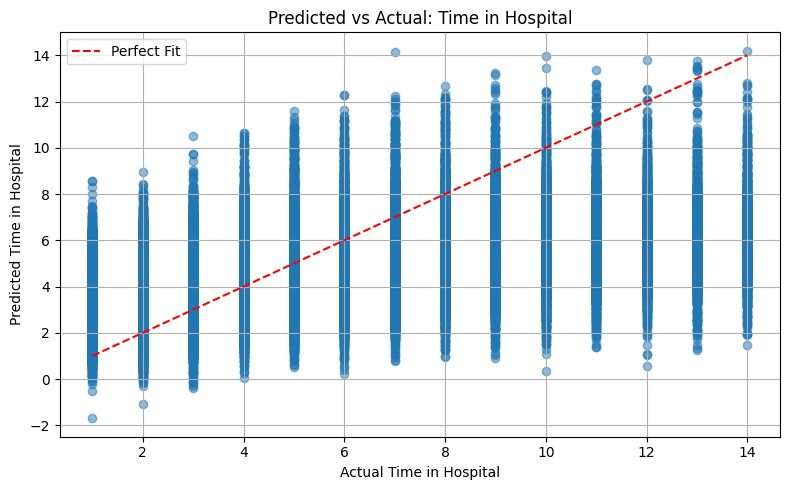

In [10]:
import matplotlib.pyplot as plt

# Predict time_in_hospital
mixed_df['predicted_time'] = result.predict()

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(mixed_df['time_in_hospital'], mixed_df['predicted_time'], alpha=0.5)
plt.plot([mixed_df['time_in_hospital'].min(), mixed_df['time_in_hospital'].max()],
         [mixed_df['time_in_hospital'].min(), mixed_df['time_in_hospital'].max()],
         color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Time in Hospital")
plt.ylabel("Predicted Time in Hospital")
plt.title("Predicted vs Actual: Time in Hospital")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Clustering 


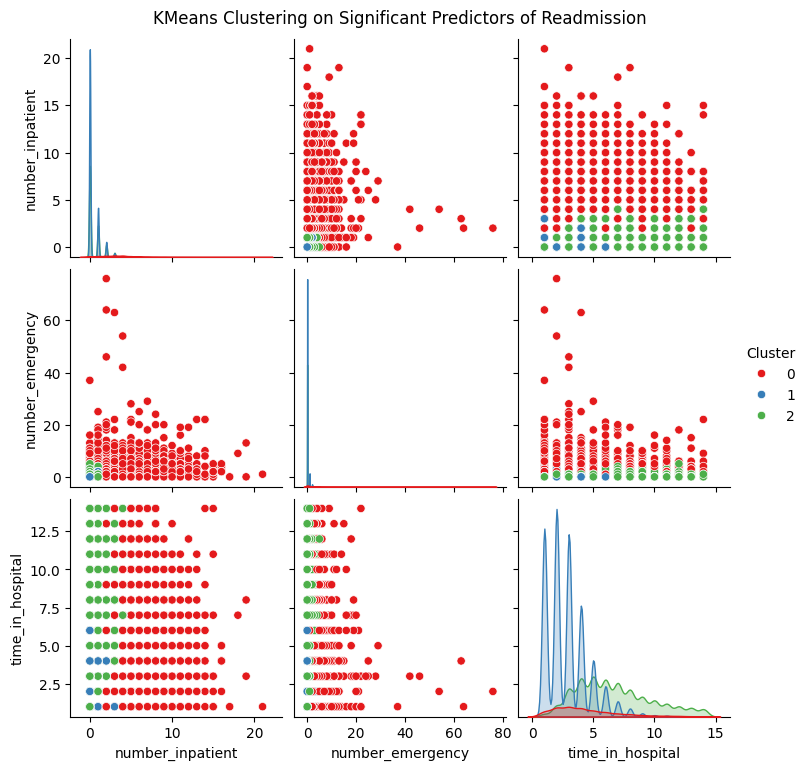

✅ Cluster plot saved to /workspaces/SP25-Project/ML/cluster_plot.png


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# ➤ Use clustering to explore patient groupings based on top predictors of readmission

# Step 1: Use top significant features
clustering_vars = [
    'number_inpatient', 'number_emergency', 'number_diagnoses',
    'time_in_hospital', 'num_medications', 'age',
    'num_lab_procedures', 'number_outpatient',
    'A1Cresult_binary', 'insulin_binary'
]

# Step 2: Drop missing values
subset = diabetes_cleaned[clustering_vars].dropna()

# Step 3: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(subset)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Step 5: Add cluster labels + readmission group
subset['Cluster'] = clusters
subset['Readmitted_Binary'] = diabetes_cleaned.loc[subset.index, 'readmitted_binary'].values

# Step 6: Visualize using a pairplot
pairplot_fig = sns.pairplot(subset, hue='Cluster', palette='Set1',
                            vars=['number_inpatient', 'number_emergency', 'time_in_hospital'])
pairplot_fig.fig.suptitle('KMeans Clustering on Significant Predictors of Readmission', y=1.02)
pairplot_fig.savefig("/workspaces/SP25-Project/ML/cluster_plot.png")  # Save PNG
plt.show()

print("✅ Cluster plot saved to /workspaces/SP25-Project/ML/cluster_plot.png")


In [12]:
# Cross-tab to quantify readmission distribution across clusters
pd.crosstab(subset['Cluster'], subset['Readmitted_Binary'], normalize='index')


Readmitted_Binary,0,1
Cluster,,
0,0.765250,0.234750
1,0.911429,0.088571
2,0.879188,0.120812


## CatBoost Model & XGBoost Model
- CatBoost is a gradient boosting algorithm that handles categorical variables natively.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Define the most significant features
top_features = [
    'number_inpatient', 'number_emergency', 'number_diagnoses',
    'time_in_hospital', 'num_medications', 'age',
    'num_lab_procedures', 'number_outpatient',
    'A1Cresult_binary', 'insulin_binary'
]

# Create feature matrix and target vector
X = diabetes_cleaned[top_features]
y = diabetes_cleaned['readmitted_binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- CATBOOST MODEL ---
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict_proba(X_test)[:, 1]
cat_auc = roc_auc_score(y_test, cat_preds)

# --- XGBOOST MODEL ---
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_preds)

# --- Print AUC Results ---
print(f"CatBoost AUC (Top Features): {cat_auc:.4f}")
print(f"XGBoost AUC (Top Features): {xgb_auc:.4f}")


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:49:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost AUC (Top Features): 0.6392
XGBoost AUC (Top Features): 0.6316


## CatBoost Model & XGBoost Model
### Hyperparameter Tuning

In [19]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

%pip install -U scikit-learn


# Define a custom scoring function for AUC
def auc_custom_scorer(estimator, X, y):
    return roc_auc_score(y, estimator.predict_proba(X)[:, 1])

# Use only top predictors
top_features = [
    'number_inpatient', 'number_emergency', 'number_diagnoses',
    'time_in_hospital', 'num_medications', 'age',
    'num_lab_procedures', 'number_outpatient',
    'A1Cresult_binary', 'insulin_binary'
]

X = diabetes_cleaned[top_features]
y = diabetes_cleaned['readmitted_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- CATBOOST ---
cat_params = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7]
}
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_search = RandomizedSearchCV(
    cat_model,
    cat_params,
    n_iter=10,
    scoring=auc_custom_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
cat_search.fit(X_train, y_train)
cat_best = cat_search.best_estimator_
cat_auc = roc_auc_score(y_test, cat_best.predict_proba(X_test)[:, 1])

# --- XGBOOST ---
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_search = RandomizedSearchCV(
    xgb_model,
    xgb_params,
    n_iter=10,
    scoring=auc_custom_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
xgb_search.fit(X_train, y_train)
xgb_best = xgb_search.best_estimator_
xgb_auc = roc_auc_score(y_test, xgb_best.predict_proba(X_test)[:, 1])

# --- Results ---
print("Tuned CatBoost AUC:", round(cat_auc, 4))
print("Best CatBoost Params:", cat_search.best_params_)
print("Tuned XGBoost AUC:", round(xgb_auc, 4))
print("Best XGBoost Params:", xgb_search.best_params_)


Note: you may need to restart the kernel to use updated packages.


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:04:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:04:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:04:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:04:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/codespace/

Tuned CatBoost AUC: 0.6486
Best CatBoost Params: {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 4}
Tuned XGBoost AUC: 0.6457
Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


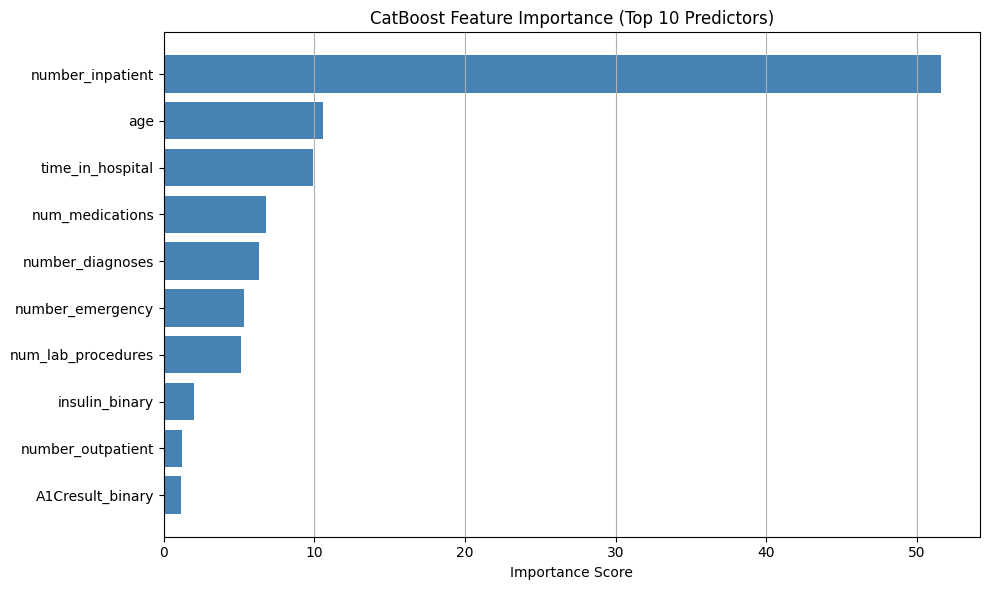

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Feature names used in training
top_features = [
    'number_inpatient', 'number_emergency', 'number_diagnoses',
    'time_in_hospital', 'num_medications', 'age',
    'num_lab_procedures', 'number_outpatient',
    'A1Cresult_binary', 'insulin_binary'
]

# --- Step 2: Get feature importance from the best CatBoost model
cat_importances = cat_best.get_feature_importance()
importance_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': cat_importances
}).sort_values(by='Importance', ascending=True)

# --- Step 3: Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.title('CatBoost Feature Importance (Top 10 Predictors)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


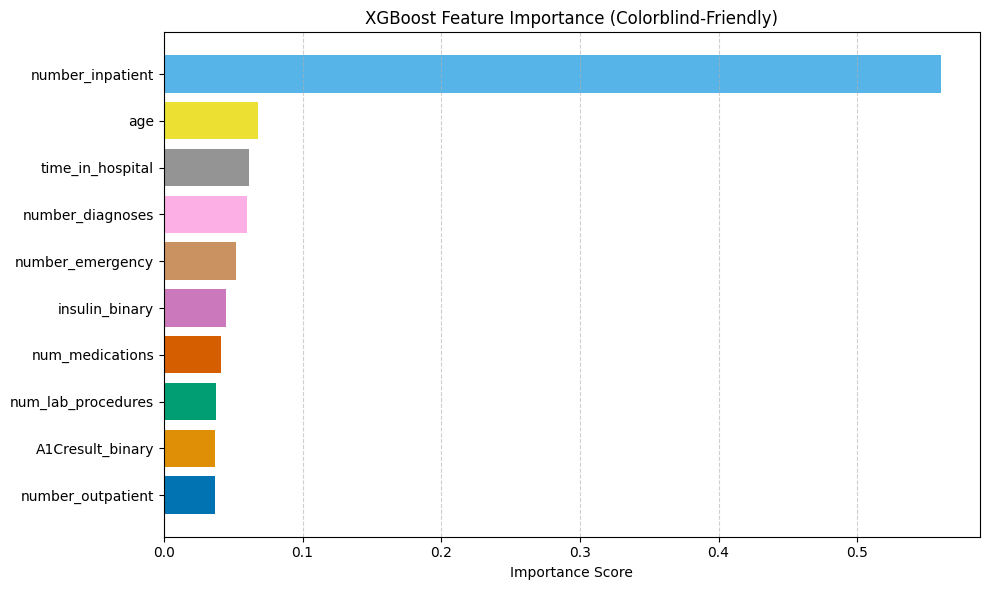

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Step 1: Get feature names and importance values from XGBoost model
xgb_feature_names = xgb_best.get_booster().feature_names
xgb_importances = xgb_best.feature_importances_

# Step 2: Create DataFrame
importance_df = pd.DataFrame({
    'Feature': xgb_feature_names,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=True)

# Step 3: Use Seaborn's colorblind-friendly palette
colors = sns.color_palette("colorblind", len(importance_df))

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Importance Score')
plt.title('XGBoost Feature Importance (Colorblind-Friendly)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
